# Project: 01-2024 LaborDE Analysis
## Author: Nadia Ordonez
## Step3 LD Exploring relationships between companies and Bundesland

# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Importing data](#2.-Importing-data)
    * [2.1 Importing libraries](#2.1-Importing-libraries)
    * [2.2 Importing dataframe](#2.2-Importing-dataframe)
* [3. Exploring relationships](#3.-Exploring-relationships)
    * [3.1 Correlations](#3.1-Correlations)
    * [3.2 Scatterplots](#3.2-Scatterplots)
    * [3.3 Pair plots](#3.3-Pair-plots)
    * [3.4 Categorical plots](#3.4-Categorical-plots)
* [4. Data driven insights](#4.-Data-driven-insights)

# 1. Introduction

In this section, I will delve into the interconnections among various variables at the Bundesland level to formulate insightful recommendations for our client, LaborDE, seeking opportunities to enhance its business activities. Through the exploration of these relationships, I aim to discern the key factors influencing a Bundesland's business attractiveness in comparison to others. This analysis will contribute to a comprehensive understanding of the dynamics at play and guide strategic decisions for optimal business expansion.

# 2. Importing data

## 2.1 Importing libraries

In [1]:
# Importing analytical and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## 2.2 Importing dataframe

In [3]:
# Define path
path = r'C:\Users\Ich\Documents\01_2024_LaborDE_analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_data', 'company_bundesland_step2.csv'), encoding='utf-8')

In [5]:
df.shape

(16, 13)

In [6]:
df.columns

Index(['bundesland_en', 'company_total', 'labor_total', 'cancer_total',
       'plz_total', 'administration_unit_id', 'bundesland_de', 'area_sqkm',
       'population', 'male', 'female', 'population_per_sqkm', 'gdp_mill_euro'],
      dtype='object')

In [7]:
df.dtypes

bundesland_en              object
company_total               int64
labor_total                 int64
cancer_total                int64
plz_total                   int64
administration_unit_id      int64
bundesland_de              object
area_sqkm                 float64
population                float64
male                      float64
female                    float64
population_per_sqkm       float64
gdp_mill_euro               int64
dtype: object

In [8]:
df

,bundesland_en,company_total,labor_total,cancer_total,plz_total,administration_unit_id,bundesland_de,area_sqkm,population,male,female,population_per_sqkm,gdp_mill_euro
0,Baden-Württemberg,299894,1381,133,2073,8,Baden-Württemberg,35748.20,11069533.0,5501693.0,5567840.0,310.0,572837
1,Bavaria,412937,1604,158,3160,9,Bayern,70541.61,13076721.0,6483793.0,6592928.0,185.0,716784
2,Berlin,142570,668,75,1318,11,Berlin,891.12,3644826.0,1792801.0,1852025.0,4090.0,179379
3,Brandenburg,57793,247,31,570,12,Brandenburg,29654.48,2511917.0,1239460.0,1272457.0,85.0,88800
4,Bremen,21891,115,9,157,4,Bremen,419.36,682986.0,338035.0,344951.0,1629.0,38698
5,Hamburg,90427,340,33,962,2,Hamburg,755.09,1841179.0,902048.0,939131.0,2438.0,144220
6,Hesse,195520,812,139,1746,6,Hessen,21115.67,6265809.0,3093044.0,3172765.0,297.0,323352
7,Lower Saxony,219162,806,121,1442,3,Niedersachsen,47709.51,7982448.0,3943243.0,4039205.0,167.0,339414
8,Mecklenburg-Western Pomerania,37426,183,24,462,13,Mecklenburg-Vorpommern,23293.61,1609675.0,793639.0,816036.0,69.0,53440
9,North Rhine-Westphalia,505294,2112,267,2310,5,Nordrhein-Westfalen,34112.31,17932651.0,8798631.0,9134020.0,526.0,793790


# 3. Exploring relationships

In [9]:
# Create a subset including only numerical data
sub = df[['company_total', 'labor_total', 'cancer_total', 'plz_total', 'administration_unit_id', 'area_sqkm', 'population', 'male', 'female', 'population_per_sqkm', 'gdp_mill_euro']]

In [10]:
# See results
sub

,company_total,labor_total,cancer_total,plz_total,administration_unit_id,area_sqkm,population,male,female,population_per_sqkm,gdp_mill_euro
0,299894,1381,133,2073,8,35748.20,11069533.0,5501693.0,5567840.0,310.0,572837
1,412937,1604,158,3160,9,70541.61,13076721.0,6483793.0,6592928.0,185.0,716784
2,142570,668,75,1318,11,891.12,3644826.0,1792801.0,1852025.0,4090.0,179379
3,57793,247,31,570,12,29654.48,2511917.0,1239460.0,1272457.0,85.0,88800
4,21891,115,9,157,4,419.36,682986.0,338035.0,344951.0,1629.0,38698
5,90427,340,33,962,2,755.09,1841179.0,902048.0,939131.0,2438.0,144220
6,195520,812,139,1746,6,21115.67,6265809.0,3093044.0,3172765.0,297.0,323352
7,219162,806,121,1442,3,47709.51,7982448.0,3943243.0,4039205.0,167.0,339414
8,37426,183,24,462,13,23293.61,1609675.0,793639.0,816036.0,69.0,53440
9,505294,2112,267,2310,5,34112.31,17932651.0,8798631.0,9134020.0,526.0,793790


## 3.1 Correlations

In [11]:
# Create a correlation matrix using pandas
sub.corr()

,company_total,labor_total,cancer_total,plz_total,administration_unit_id,area_sqkm,population,male,female,population_per_sqkm,gdp_mill_euro
company_total,1.000000,0.995036,0.967475,0.932747,-0.284352,0.694337,0.989759,0.989830,0.989634,-0.080373,0.992904
labor_total,0.995036,1.000000,0.966911,0.921139,-0.254445,0.656118,0.989079,0.989169,0.988935,-0.057383,0.990466
cancer_total,0.967475,0.966911,1.000000,0.870334,-0.308967,0.606614,0.967690,0.966656,0.968642,-0.095502,0.945940
plz_total,0.932747,0.921139,0.870334,1.000000,-0.238926,0.744341,0.895750,0.897783,0.893721,-0.028853,0.943011
administration_unit_id,-0.284352,-0.254445,-0.308967,-0.238926,1.000000,-0.001236,-0.240353,-0.239179,-0.241482,-0.177578,-0.269328
area_sqkm,0.694337,0.656118,0.606614,0.744341,-0.001236,1.000000,0.714454,0.717550,0.711401,-0.524180,0.722296
population,0.989759,0.989079,0.967690,0.895750,-0.240353,0.714454,1.000000,0.999970,0.999972,-0.179094,0.985479
male,0.989830,0.989169,0.966656,0.897783,-0.239179,0.717550,0.999970,1.000000,0.999885,-0.180370,0.986309
female,0.989634,0.988935,0.968642,0.893721,-0.241482,0.711401,0.999972,0.999885,1.000000,-0.177841,0.984614
population_per_sqkm,-0.080373,-0.057383,-0.095502,-0.028853,-0.177578,-0.524180,-0.179094,-0.180370,-0.177841,1.000000,-0.123766


#### Create a correlation heatmap using seaborn:

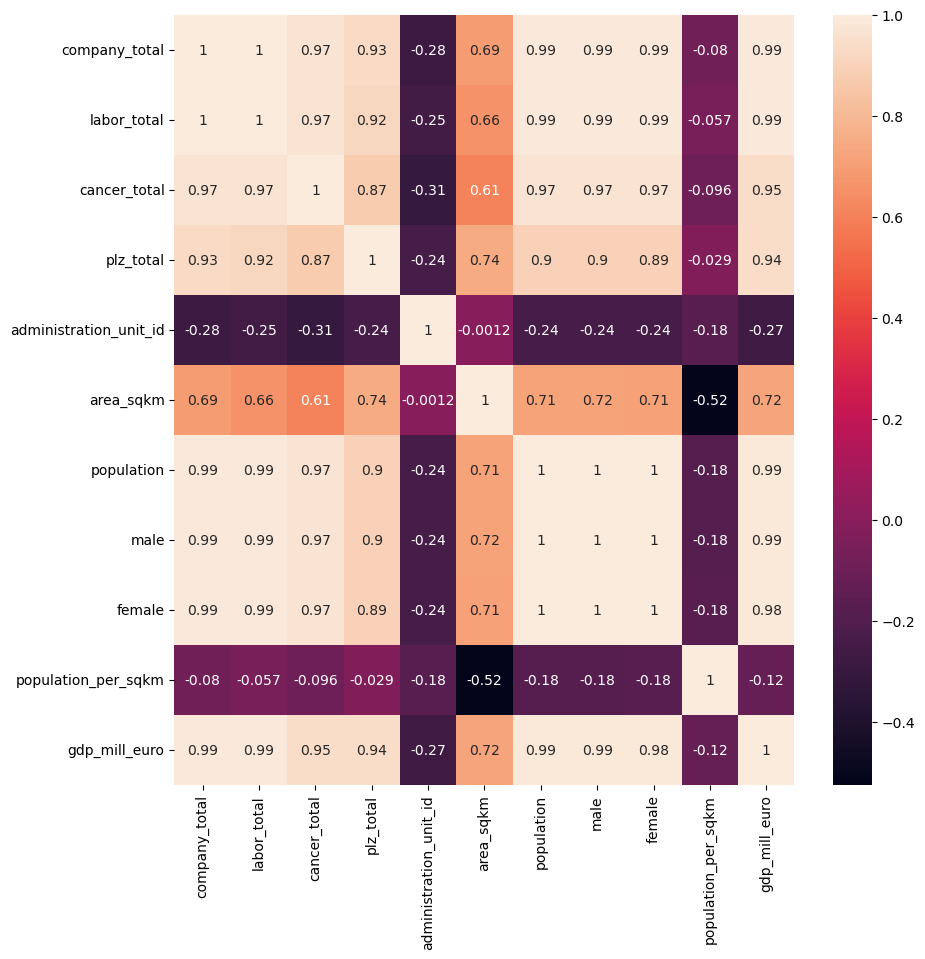

In [12]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

The variable "labor_total" exhibits notable correlations with other key factors, as outlined below:

* **Correlation with “company_total” variable:** A coefficient of 1 suggests a robust positive correlation. This implies that as the number of companies increases in a given Bundesland, there is a corresponding rise in the potential availability of companies offering laboratory diagnostic services, and conversely, a decrease in the number of companies aligns with a reduced potential for such services.

* **Correlation with “Population” variable:** A coefficient of 0.99 indicates a strong positive correlation. This implies that as the population of a Bundesland increases, there is a corresponding surge in the potential number of companies offering laboratory diagnostic services, and conversely, a decrease in population is associated with a reduced potential for such services.

* **Correlation with “gdp” Variable:** A coefficient of 0.99 suggests a robust positive correlation. This implies that as the GDP increases in a given Bundesland, there is a corresponding rise in the number of potential number of companies offering laboratory diagnostic services, and conversely,  a decrease in the number of companies aligns with a lower GDP.

In broader terms, a Bundesland in Germany characterized by a high population, a substantial number of companies and a high GDP would be particularly advantageous for our LaborDe client. These Bundesländer represent lucrative business prospects, offering a higher volume of potential company customers for LaborDE.

## 3.2 Scatterplots

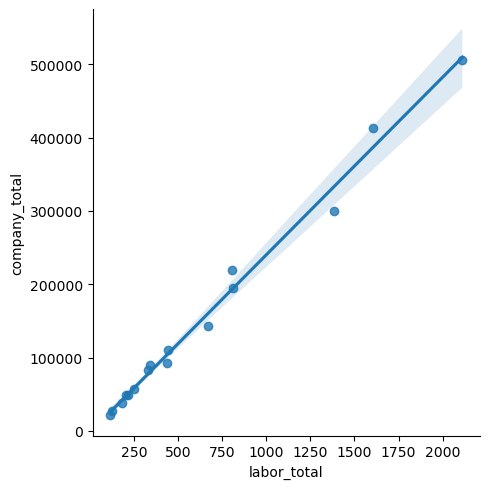

In [13]:
# Create a scatterplot 
sns.lmplot(x = 'labor_total', y = 'company_total', data = df)

# Save plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visuals', 'scatterplot_labor_vs_companies_bundesland.png'))

# Display the plot
plt.show()

The positive upward linear trend in the data suggests that as the number of companies increases within a specific Bundesland, there is a simultaneous increase in the potential availability of companies offering laboratory diagnostic services. The close proximity of data points to the trend line indicates a strong fit, and no outliers are observed, reinforcing the reliability of this correlation.

## 3.3 Pair plots

In [14]:
# Selecting variables
sub_2 = df[['labor_total', 'company_total', 'population', 'gdp_mill_euro', 'area_sqkm']]

In [15]:
# data types
sub_2.dtypes

labor_total        int64
company_total      int64
population       float64
gdp_mill_euro      int64
area_sqkm        float64
dtype: object

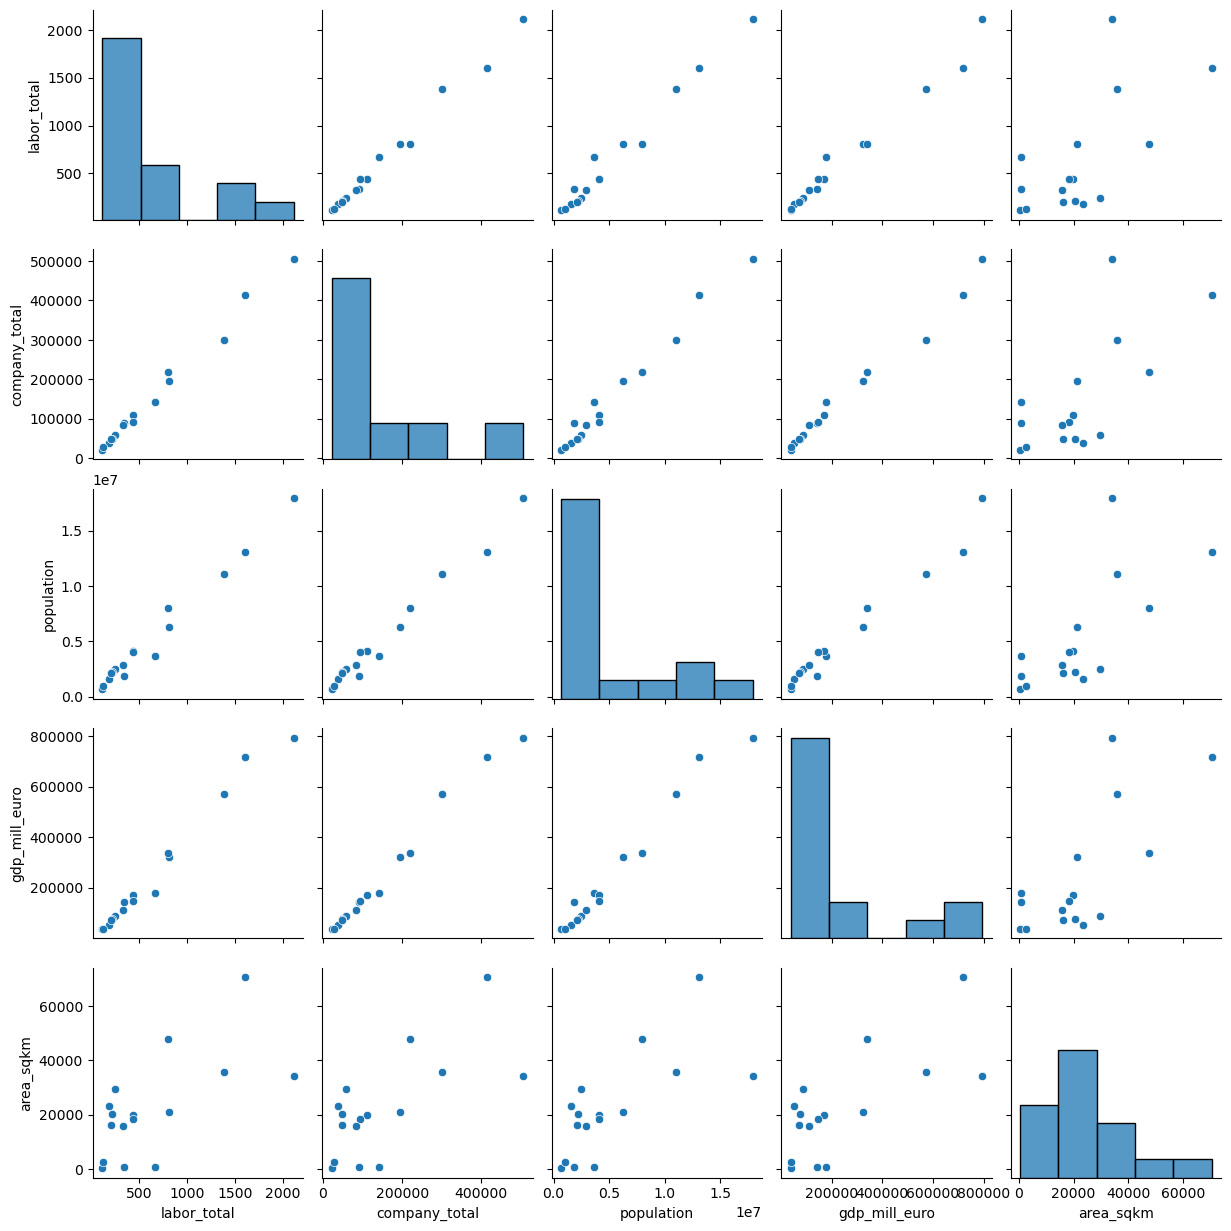

In [16]:
# Create a pair plot 
g = sns.pairplot(sub_2)

# Save the pair plot
g.savefig(os.path.join(path, '04_Analysis', 'Visuals', 'pair_plot_relevant_bundesland_features.png'))

# Display the pair plot
plt.show()

As anticipated through correlation analysis, there exists a robust positive relationship between the total number of potential laboratory customers for our client, LaborDE, and the overall number of companies, the total population within each Bundesland and their corresponding GDP. Additionally, a positive relationship is discerned between "labor_total" and the area in sqkm of each Bundesland. However, a greater degree of variance is noticeable in this association, as evidenced by the dispersed nature of the data points.

## 3.4 Categorical plots

### Creating a categorical variable

<Axes: xlabel='labor_total', ylabel='Count'>

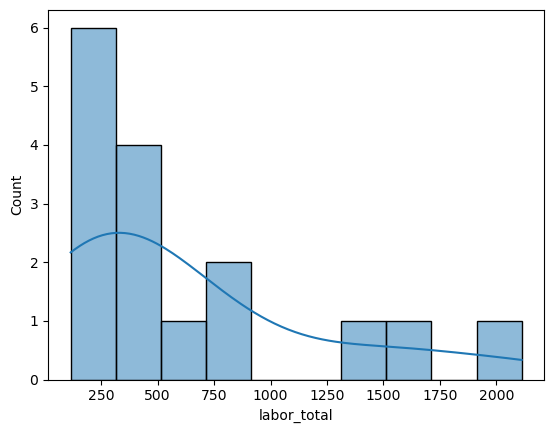

In [17]:
# Using a histogram to visualize the distribution of the variable to create sensible categories
# The argument "kde" add a line that encompasses the distribution
sns.histplot(df['labor_total'], bins = 10, kde = True)

In [18]:
df.loc[df['labor_total'] < 1000, 'Customer base'] = 'low customer base'

In [19]:
df.loc[(df['labor_total'] >= 1000) & (df['labor_total'] < 1750), 'Customer base'] = 'middle customer base'

In [20]:
df.loc[df['labor_total'] >= 1750, 'Customer base'] = 'high customer base'

In [21]:
df['Customer base'].value_counts(dropna = False)

Customer base
low customer base       13
middle customer base     2
high customer base       1
Name: count, dtype: int64

In [22]:
df.columns

Index(['bundesland_en', 'company_total', 'labor_total', 'cancer_total',
       'plz_total', 'administration_unit_id', 'bundesland_de', 'area_sqkm',
       'population', 'male', 'female', 'population_per_sqkm', 'gdp_mill_euro',
       'Customer base'],
      dtype='object')

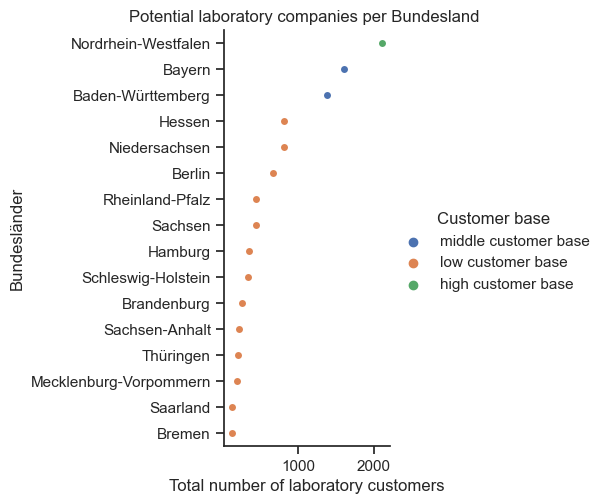

In [23]:
# Create a categorical plot in seaborn using the categories created above
sns.set(style="ticks")

# Create an ordered list of Bundesländer based on the descending order of 'labor_total'
order_list = df.groupby("bundesland_de")["labor_total"].sum().sort_values(ascending=False).index

g = sns.catplot(x="labor_total", y="bundesland_de", hue="Customer base", data=df, order=order_list)

# Customizing labels
g.set(xlabel="Total number of laboratory customers", ylabel="Bundesländer", title="Potential laboratory companies per Bundesland ")

# Save the categorical plot
g.savefig(os.path.join(path, '04_Analysis', 'Visuals', 'categorical_plot_bundesland.png'))

# Show the plot
plt.show()

# 4. Data driven insights

Following a thorough visual exploration of variable relationships, I have identified two Bundesländer boasting over 1000 potential laboratory customers for our client, LaborDE. Currently situated in NRW, which leads with the highest number of potential customers, LaborDE is well-positioned for expansion. Based on this exhaustive data analysis, it is strongly recommended that LaborDE considers broadening its business activities to Bayern or Baden-Württemberg. These two Bundesländer showcase a significant number of potential laboratory customers, rendering them highly promising regions for LaborDE's growth and outreach. 

Upon concluding this initial visual exploration, it becomes imperative to delve into whether the count of potential companies associated with cancer businesses correlates with the overall count of potential laboratory customers. Addressing this query will provide a comprehensive resolution to the business questions posed by our client, shedding light on the national landscape.

Lastly, variables strongly correlated with a higher count of potential company customers include the total number of companies, overall population, and GDP of the respective Bundesland. In Step 5, I aim to test the hypothesis: "The greater the number of total companies in a location, the greater the likelihood of potential laboratory customers for LaborDE in that region." This will be accomplished through Supervised Machine Learning using a regression model. Similarly in Step 6, I will use unsupervised Machine Learning applying a k-means clustering algorithm to split Bundesländer into clusters that use all numerical variables to cluster my datapoins. 